In [1]:
import yfinance as yf 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# S&P500 futures price
data = yf.download("ES=F",
    start = "2024-01-01",
    end = "2024-12-31")
data 

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ES=F,ES=F,ES=F,ES=F,ES=F
Date,,,,,
2024-01-02,4787.25,4828.00,4765.50,4818.00,1678142
2024-01-03,4746.50,4790.75,4741.00,4790.75,1707174
2024-01-04,4729.50,4766.50,4727.00,4750.00,1395366
2024-01-05,4734.75,4760.25,4702.00,4732.75,1767245
2024-01-08,4801.25,4803.25,4715.25,4735.75,1417728
...,...,...,...,...,...
2024-12-23,6036.00,6043.00,5965.00,6001.75,1406019
2024-12-24,6098.00,6099.50,6030.00,6037.75,634201


In [3]:
prices = data["Close"]
prices

Ticker,ES=F
Date,
2024-01-02,4787.25
2024-01-03,4746.50
2024-01-04,4729.50
2024-01-05,4734.75
2024-01-08,4801.25
...,...
2024-12-23,6036.00
2024-12-24,6098.00
2024-12-26,6095.25


<Axes: xlabel='Date'>

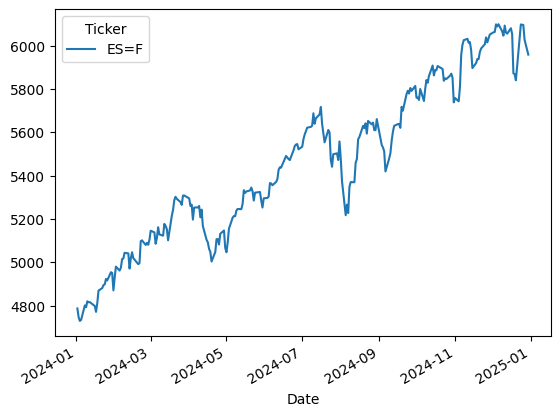

In [4]:
prices.plot()

In [5]:
returns = prices.pct_change()
returns = returns.dropna()
returns

Ticker,ES=F
Date,
2024-01-03,-0.008512
2024-01-04,-0.003582
2024-01-05,0.001110
2024-01-08,0.014045
2024-01-09,-0.001770
...,...
2024-12-23,0.033516
2024-12-24,0.010272
2024-12-26,-0.000451


In [6]:
# build a wealth index (cumulative returns over time)
cum_returns = (1+ returns).cumprod()
# cumulative maximum over time 
# these are the previoud peaks 
cum_max = cum_returns.cummax()

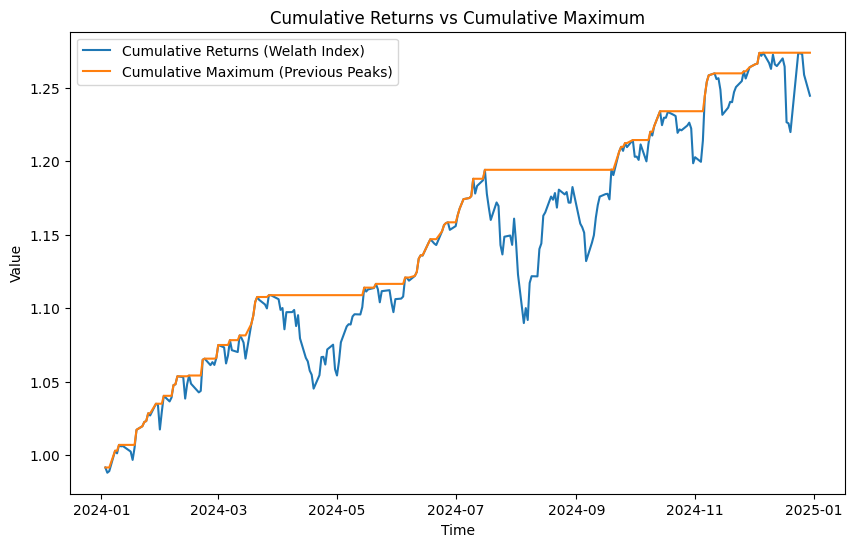

In [7]:


plt.figure(figsize=(10, 6))  # Create a new figure
plt.plot(cum_returns, label='Cumulative Returns (Welath Index)')  # Plot first line
plt.plot(cum_max, label='Cumulative Maximum (Previous Peaks)')     # Plot second line


# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Cumulative Returns vs Cumulative Maximum')
plt.legend()

plt.show()

In [14]:

drawdown = (cum_max -cum_returns  )/cum_max

Ticker
ES=F   2024-08-05
dtype: datetime64[ns]
[1.08741091]


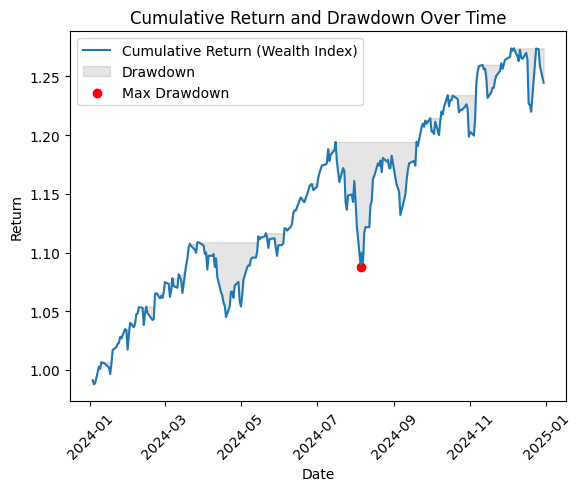

In [15]:
fig,ax = plt.subplots()

ax.plot(cum_returns.index,
        cum_returns,
        label = "Cumulative Return (Wealth Index)")
ax.fill_between(cum_returns.index, cum_returns["ES=F"], cum_max["ES=F"],
                alpha = 0.1,
                color = "k",
                label = "Drawdown")

max_drawdown_idx = drawdown.idxmax()
max_drawdown_value = 1+ drawdown.loc[max_drawdown_idx].values[0]
print(max_drawdown_idx)
print(max_drawdown_value)
ax.scatter(max_drawdown_idx,max_drawdown_value,
           label = "Max Drawdown",
           color  = "red")
ax.set_xlabel("Date")
ax.set_ylabel("Return")

plt.title("Cumulative Return and Drawdown Over Time")
plt.xticks(rotation = 45 )
plt.legend()
plt.show()



In [10]:
cum_returns["ES=F"]

Date
2024-01-03    0.991488
2024-01-04    0.987937
2024-01-05    0.989033
2024-01-08    1.002924
2024-01-09    1.001149
                ...   
2024-12-23    1.260849
2024-12-24    1.273800
2024-12-26    1.273226
2024-12-27    1.258969
2024-12-30    1.244713
Name: ES=F, Length: 250, dtype: float64

In [11]:
cum_max

Ticker,ES=F
Date,
2024-01-03,0.991488
2024-01-04,0.991488
2024-01-05,0.991488
2024-01-08,1.002924
2024-01-09,1.002924
...,...
2024-12-23,1.274009
2024-12-24,1.274009
2024-12-26,1.274009
